# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Exploratory data analysis

In [2]:
data = pd.read_csv(r'C:\Users\olama\Downloads\data01.csv')
data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [3]:
print(data.dtypes)

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

### Display basic statistics for each numerical column


In [4]:
data.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

## Data Cleaning

In [6]:
data_missing= (data== '?').sum()
# data_missing

In [7]:
data_missing2 = data.isna().sum()
# print(data_missing2)

In [8]:
# Replace the values with NaN
data[data == '?'] = np.nan

# Iterate over each column in data_missing2
for col in data_missing2.index:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [9]:
data.duplicated().sum()

0

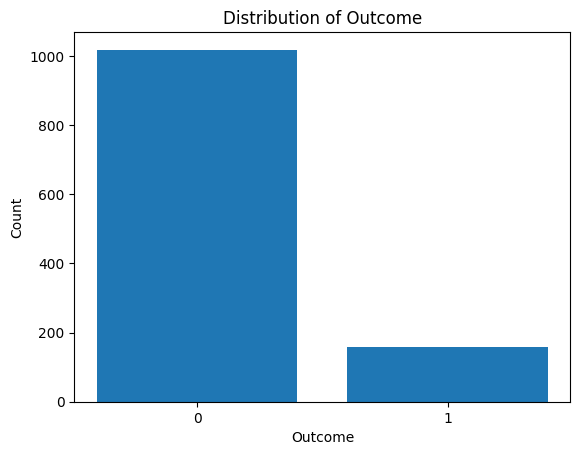

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df' with a column named 'outcome'
outcome_counts = data['outcome'].value_counts()
total_samples = outcome_counts.sum()

outcome_0 = outcome_counts[0]
outcome_1 = outcome_counts[1]

proportion_0 = outcome_0 / total_samples
proportion_1 = outcome_1 / total_samples

# Plotting the bar plot
labels = ['0', '1']
values = [outcome_0, outcome_1]

plt.bar(labels, values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')

plt.show()

In [11]:
# Calculate quartiles and IQR for each column
outliers = pd.DataFrame()

for column in data.columns:
    Q1 = data[column].describe()['25%']
    Q3 = data[column].describe()['75%']
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check for outliers in the current column
    column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    if not column_outliers.empty:
        # Print the column name and outlier values
        print(f"Column: {column}")
        print(column_outliers[column])
        print("\n")

Column: outcome
16      1.0
21      1.0
27      1.0
37      1.0
40      1.0
       ... 
1099    1.0
1145    1.0
1147    1.0
1164    1.0
1168    1.0
Name: outcome, Length: 159, dtype: float64


Column: age
113    28
264    32
288    19
523    19
589    25
Name: age, dtype: int64


Column: BMI
3        83.264629
10       50.461212
18       91.176653
23       51.360148
24       76.530612
28       46.507661
44       53.633218
68       49.549571
76       48.748950
92       53.621933
113     104.970366
114      69.965418
126      61.303834
143      50.421359
155      70.708546
164      47.718601
172      53.018931
187      65.117210
191      60.696495
195      52.861602
204      63.231586
228      62.885074
230      45.989229
240      53.374762
260      49.461451
279      61.682252
456      46.929160
480      45.353681
524      50.874275
526      68.161315
539      55.674740
589      57.926531
598      52.721194
632      47.265625
635      45.447280
666      58.356407
675      64.837258
680 

### Data Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize the columns of the DataFrame
normalized_data = scaler.fit_transform(data)

# Create a new DataFrame with normalized values
normalized_data = pd.DataFrame(normalized_data, columns=data.columns)
normalized_data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,0.248990,0.0,0.6625,0.0,0.264576,0.0,0.0,0.0,1.0,...,0.601029,0.179679,0.683867,0.346185,0.455782,0.285714,0.238714,0.000000,0.266124,0.666667
1,0.0,0.397026,0.0,0.7000,1.0,0.108598,0.0,0.0,0.0,0.0,...,0.604495,0.344118,0.430145,0.254886,0.182398,0.275510,0.591427,0.000000,0.742016,0.666667
2,0.0,0.095991,0.0,0.8000,1.0,0.144350,0.0,0.0,0.0,0.0,...,0.650050,0.368627,0.605553,0.178313,0.283285,0.363265,0.508892,0.000000,0.660614,0.333333
3,0.0,0.304535,0.0,0.3000,1.0,0.763099,0.0,0.0,0.0,0.0,...,0.594790,0.653394,0.279339,0.303270,0.203110,0.571429,0.738714,0.012766,0.704446,0.666667
4,0.0,0.381766,0.0,0.7000,1.0,0.201673,1.0,0.0,0.0,0.0,...,0.549037,0.478431,0.573439,0.452209,0.093537,0.326531,0.262654,0.012766,0.391359,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,1.0,0.711026,0.0,0.5375,0.0,0.132827,1.0,1.0,0.0,1.0,...,0.550225,0.840336,0.335116,0.716007,0.491740,0.591837,0.426813,0.089362,0.335504,0.416667
1173,1.0,0.014498,0.0,0.7375,0.0,0.136165,0.0,1.0,0.0,1.0,...,0.524413,0.899654,0.507655,0.610892,0.229167,0.591837,0.218988,0.089362,0.335504,0.250000
1174,1.0,0.620179,0.0,0.8250,1.0,0.115090,1.0,1.0,0.0,1.0,...,0.532399,0.415686,0.402726,0.390361,0.235180,0.591837,0.459644,0.089362,0.335504,0.666667
1175,1.0,0.208083,0.0,0.7500,1.0,0.239477,0.0,0.0,1.0,1.0,...,0.632224,0.349020,0.561607,0.483133,0.258163,0.591837,0.330882,0.089362,0.335504,0.166667


## Feature Selection

Filter model: Univariate Feature Selection, specifically the SelectKBest method. This method is a type of filter-based feature selection technique.

Filter-based feature selection methods evaluate each feature independently of the others. They assign a score or rank to each feature based on their relationship with the target variable. Features with higher scores are considered more important or relevant to the target variable.

In [13]:
X = normalized_data.drop("outcome", axis=1)  # Features
y = normalized_data["outcome"]  # Target variable

# Apply SelectKBest class to extract feature scores
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate the data frames for better visualization
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Print feature scores
print("Feature Scores:")
print(feature_scores.to_string(index=False))

# Select top 10 features based on scores
selected_features = feature_scores.nlargest(40, 'Score')
print("\nTop 40 Features:")
print(selected_features.to_string(index=False))

Feature Scores:
                 Feature     Score
                   group  0.717802
                      ID  1.907526
                     age  4.873630
                 gendera  0.585885
                     BMI  7.862936
            hypertensive  6.231968
      atrialfibrillation 12.167430
          CHD with no MI  0.250158
                diabetes  2.987368
       deficiencyanemias 11.688077
              depression  4.352826
            Hyperlipemia  3.333101
           Renal failure 14.090273
                    COPD  2.626107
              heart rate 20.364201
 Systolic blood pressure 20.394502
Diastolic blood pressure  8.730745
        Respiratory rate 16.506112
             temperature 10.202876
                   SP O2  6.037269
            Urine output 34.366143
              hematocrit  0.331172
                     RBC  0.687496
                     MCH  0.209932
                    MCHC  1.190173
                     MCV  1.365089
                     RDW 26.387612
    

In [14]:
selected_feature_names = selected_features['Feature'].tolist()

# Filter the data dataframe to only include the selected features
filtered_data = normalized_data[selected_feature_names]

In [15]:
filtered_data

,Lactic acid,Anion gap,Bicarbonate,Leucocyte,Urea nitrogen,Blood calcium,Urine output,RDW,INR,PT,...,age,depression,Chloride,Hyperlipemia,diabetes,COPD,PCO2,Creatinine,ID,MCV
0,0.000000,0.346185,0.238714,0.116783,0.285453,0.179679,0.244331,0.243564,0.017208,0.008174,...,0.6625,0.0,0.683867,1.0,1.0,0.0,0.266124,0.110852,0.248990,0.504488
1,0.000000,0.254886,0.591427,0.195514,0.095760,0.344118,0.161565,0.128005,0.030593,0.050677,...,0.7000,0.0,0.430145,0.0,0.0,1.0,0.742016,0.056063,0.397026,0.657867
2,0.000000,0.178313,0.508892,0.083217,0.182233,0.368627,0.274943,0.691648,0.010516,0.019208,...,0.8000,0.0,0.605553,0.0,0.0,0.0,0.660614,0.105157,0.095991,0.872228
3,0.012766,0.303270,0.738714,0.125677,0.063485,0.653394,0.993197,0.291762,0.240280,0.277363,...,0.3000,0.0,0.279339,0.0,0.0,0.0,0.704446,0.020907,0.304535,0.425488
4,0.012766,0.452209,0.262654,0.135086,0.240694,0.478431,0.505102,0.246315,0.030593,0.050677,...,0.7000,0.0,0.573439,0.0,0.0,1.0,0.391359,0.110306,0.381766,0.524815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.089362,0.716007,0.426813,0.118219,0.272665,0.840336,0.147959,0.204483,0.043977,0.040869,...,0.5375,1.0,0.335116,1.0,1.0,0.0,0.335504,0.532027,0.711026,0.527455
1173,0.089362,0.610892,0.218988,0.343528,0.186344,0.899654,0.147959,0.388173,0.109943,0.140939,...,0.7375,1.0,0.507655,1.0,1.0,0.0,0.335504,0.107029,0.014498,0.497936
1174,0.089362,0.390361,0.459644,0.141200,0.160311,0.415686,0.013379,0.306397,0.030593,0.047408,...,0.8250,0.0,0.402726,0.0,1.0,0.0,0.335504,0.161324,0.620179,0.511616
1175,0.089362,0.483133,0.330882,0.092227,0.192738,0.349020,0.293084,0.230593,0.082218,0.103690,...,0.7500,1.0,0.561607,1.0,1.0,0.0,0.335504,0.096307,0.208083,0.642621


###### Wrapper model: 
Recursive Feature Elimination (RFE) with logistic regression. RFE is a wrapper-based feature selection technique that uses a machine learning model to rank the features based on their importance.

In [16]:
X = normalized_data.drop("outcome", axis=1)  # Features
y = normalized_data["outcome"]  # Target variable

# Feature extraction using RFE with logistic regression
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=40)
fit = rfe.fit(X, y)

# Get rankings of all features
feature_rankings = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})

# Print rankings of all features
print("Rankings of All Features:")
print(feature_rankings.to_string(index=False))

# Get selected features
selected_features2 = feature_rankings[feature_rankings['Ranking'] == 1]

# Print selected features
print("\nSelected Features:")
print(selected_features2.to_string(index=False))

Rankings of All Features:
                 Feature  Ranking
                   group        1
                      ID        1
                     age        1
                 gendera        6
                     BMI        1
            hypertensive        1
      atrialfibrillation        1
          CHD with no MI       11
                diabetes        4
       deficiencyanemias        1
              depression        1
            Hyperlipemia        1
           Renal failure        1
                    COPD        1
              heart rate        1
 Systolic blood pressure        1
Diastolic blood pressure        1
        Respiratory rate        1
             temperature        1
                   SP O2        1
            Urine output        1
              hematocrit        9
                     RBC        1
                     MCH        7
                    MCHC        1
                     MCV        1
                     RDW        1
               Leucocy

In [17]:
selected_feature_names2 = selected_features2['Feature'].tolist()

# Filter the data dataframe to only include the selected features
filtered_data2 = normalized_data[selected_feature_names2]

In [18]:
filtered_data2

,group,ID,age,BMI,hypertensive,atrialfibrillation,deficiencyanemias,depression,Hyperlipemia,Renal failure,...,Urea nitrogen,glucose,Blood potassium,Blood calcium,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2
0,0.0,0.248990,0.6625,0.264576,0.0,0.0,1.0,0.0,1.0,1.0,...,0.285453,0.138069,0.509346,0.179679,0.346185,0.455782,0.285714,0.238714,0.000000,0.266124
1,0.0,0.397026,0.7000,0.108598,0.0,0.0,1.0,0.0,0.0,0.0,...,0.095760,0.232659,0.406542,0.344118,0.254886,0.182398,0.275510,0.591427,0.000000,0.742016
2,0.0,0.095991,0.8000,0.144350,0.0,0.0,1.0,0.0,0.0,1.0,...,0.182233,0.236976,0.792056,0.368627,0.178313,0.283285,0.363265,0.508892,0.000000,0.660614
3,0.0,0.304535,0.3000,0.763099,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063485,0.177252,0.388785,0.653394,0.303270,0.203110,0.571429,0.738714,0.012766,0.704446
4,0.0,0.381766,0.7000,0.201673,1.0,0.0,1.0,0.0,0.0,1.0,...,0.240694,0.227622,0.500000,0.478431,0.452209,0.093537,0.326531,0.262654,0.012766,0.391359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,1.0,0.711026,0.5375,0.132827,1.0,1.0,0.0,1.0,1.0,1.0,...,0.272665,0.153507,0.716956,0.840336,0.716007,0.491740,0.591837,0.426813,0.089362,0.335504
1173,1.0,0.014498,0.7375,0.136165,0.0,1.0,0.0,1.0,1.0,1.0,...,0.186344,0.206275,0.426168,0.899654,0.610892,0.229167,0.591837,0.218988,0.089362,0.335504
1174,1.0,0.620179,0.8250,0.115090,1.0,1.0,1.0,0.0,0.0,1.0,...,0.160311,0.093063,0.308411,0.415686,0.390361,0.235180,0.591837,0.459644,0.089362,0.335504
1175,1.0,0.208083,0.7500,0.239477,0.0,0.0,1.0,1.0,1.0,1.0,...,0.192738,0.197160,0.306075,0.349020,0.483133,0.258163,0.591837,0.330882,0.089362,0.335504


# PCA

In [19]:
data_without_outcome= data.drop("outcome", axis=1)

In [20]:
data_without_outcome

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,72,1,37.588179,0,0,0,1,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.00,55
1,1,139812,75,2,23.296976,0,0,0,0,1,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.00,55
2,1,109787,83,2,26.572634,0,0,0,0,1,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.50,35
3,1,130587,43,2,83.264629,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.00,55
4,1,138290,75,2,31.824842,1,0,0,0,1,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.00,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,62,1,25.516870,1,1,0,1,0,...,136.714286,10.271429,94.428571,20.142857,2.714286,7.380,27.714286,1.2,45.54,40
1173,2,101659,78,1,25.822710,0,1,0,1,0,...,135.680000,10.523529,101.720000,18.160000,2.012500,7.380,20.480000,1.2,45.54,30
1174,2,162069,85,2,23.891779,1,1,0,1,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,7.380,28.857143,1.2,45.54,55
1175,2,120967,79,2,35.288554,0,0,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,7.380,24.375000,1.2,45.54,25


In [21]:
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(data_without_outcome), columns=data_without_outcome.columns)

In [22]:
features_scaled

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.653197,-0.886597,-0.153051,-1.051449,0.979759,-1.595362,-0.906632,-0.306376,1.171744,1.396379,...,-0.033742,-1.814096,1.289532,-0.286026,1.980755,-2.551958,-1.112245,-1.333503,-0.503156,0.488583
1,-0.653197,-0.377851,0.070357,0.951068,-0.637332,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,...,-0.000272,-0.591828,-0.719329,-0.935527,-0.925400,-2.637654,1.264720,-1.333503,2.950257,0.488583
2,-0.653197,-1.412399,0.666111,0.951068,-0.266681,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,...,0.439627,-0.409648,0.669477,-1.480271,0.147056,-1.900669,0.708507,-1.333503,2.359541,-1.066269
3,-0.653197,-0.695710,-2.312661,0.951068,6.148180,-1.595362,-0.906632,-0.306376,-0.853429,-0.716138,...,-0.093989,1.707014,-1.913344,-0.591321,-0.705227,-0.152474,2.257299,-1.224761,2.677619,0.488583
4,-0.653197,-0.430293,0.070357,0.951068,0.327621,0.626817,-0.906632,-0.306376,-0.853429,1.396379,...,-0.535801,0.406523,0.415209,0.468234,-1.870013,-2.209175,-0.950913,-1.224761,0.405636,0.488583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,1.530931,0.701249,-0.897744,-1.051449,-0.386144,0.626817,1.102983,-0.306376,1.171744,-0.716138,...,-0.524325,3.096553,-1.471722,2.344905,2.362991,0.018917,0.155367,-0.572305,0.000315,-0.677556
1173,1.530931,-1.692459,0.293765,-1.051449,-0.351537,-1.595362,1.102983,-0.306376,1.171744,-0.716138,...,-0.773576,3.537461,-0.105637,1.597110,-0.428235,0.018917,-1.245183,-0.572305,0.000315,-1.454981
1174,1.530931,0.389041,0.815050,0.951068,-0.570028,0.626817,1.102983,-0.306376,1.171744,1.396379,...,-0.696460,-0.059860,-0.936422,0.028249,-0.364314,0.018917,0.376623,-0.572305,0.000315,0.488583
1175,1.530931,-1.027179,0.368234,0.951068,0.719550,-1.595362,-0.906632,3.263965,1.171744,1.396379,...,0.267493,-0.555392,0.321532,0.688227,-0.119993,0.018917,-0.491115,-0.572305,0.000315,-1.843694


In [23]:
# Apply PCA
pca = PCA(n_components=2)
pca_features = pd.DataFrame(pca.fit_transform(features_scaled))

In [24]:
pca_features

,0,1
0,-1.293278,-0.389248
1,2.382209,-0.755447
2,-0.148241,-0.860759
3,6.178509,4.785487
4,-0.532345,-0.594759
...,...,...
1172,-2.785357,4.494665
1173,-2.781448,1.863429
1174,-1.999725,0.287830
1175,-1.809169,0.038297


In [25]:
# Access PCA components (feature importance)
component_names = ['PC1', 'PC2']
explained_variance_ratio = pca.explained_variance_ratio_
component_df = pd.DataFrame(pca.components_, columns=features_scaled.columns.tolist())
component_df.index = component_names

print("Feature Importance:")
component_df

Feature Importance:


,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
PC1,0.002961,0.012706,-0.128644,0.023672,0.149955,-0.040395,-0.121802,-0.029975,-0.047746,-0.097409,...,0.080130,0.098021,-0.109066,-0.306446,-0.104811,0.067338,0.321168,-0.108375,0.207629,0.078949
PC2,0.023926,0.011968,-0.094997,-0.061561,0.175766,0.014158,0.065814,0.009274,0.131840,-0.062181,...,-0.069612,0.163276,-0.243135,0.145237,0.104578,-0.112265,0.134444,0.101182,0.171685,-0.147896


In [26]:
correlation_matrix = np.corrcoef(features_scaled.T)
correlation_matrix

array([[ 1.00000000e+00,  1.85875593e-03,  7.74901371e-05, ...,
        -2.43943052e-03,  5.60517874e-03, -1.20912812e-02],
       [ 1.85875593e-03,  1.00000000e+00, -2.65464966e-02, ...,
         8.60493942e-03,  6.34637915e-03,  1.55466636e-02],
       [ 7.74901371e-05, -2.65464966e-02,  1.00000000e+00, ...,
         6.10691709e-03, -1.09699858e-01,  5.43995261e-02],
       ...,
       [-2.43943052e-03,  8.60493942e-03,  6.10691709e-03, ...,
         1.00000000e+00, -2.45164848e-01, -1.44880521e-01],
       [ 5.60517874e-03,  6.34637915e-03, -1.09699858e-01, ...,
        -2.45164848e-01,  1.00000000e+00,  1.07036365e-01],
       [-1.20912812e-02,  1.55466636e-02,  5.43995261e-02, ...,
        -1.44880521e-01,  1.07036365e-01,  1.00000000e+00]])

<Axes: >

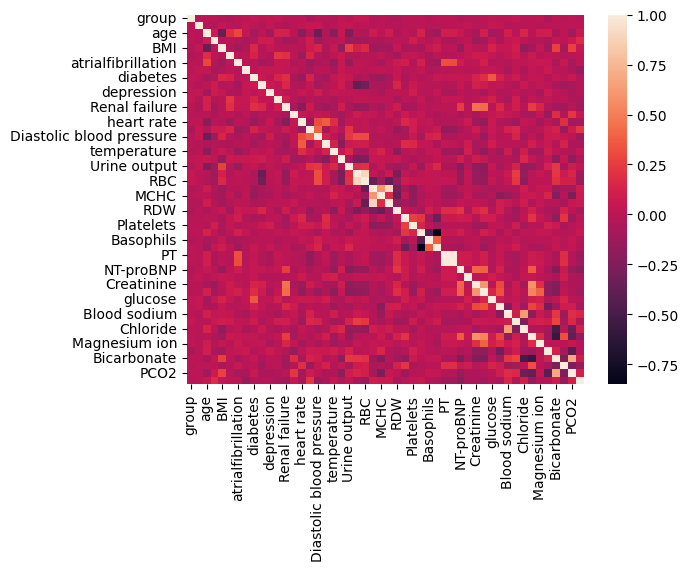

In [27]:
import seaborn as sns
sns.heatmap(features_scaled.corr())

<Axes: >

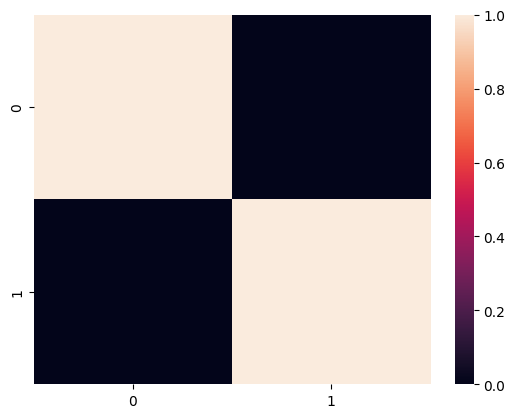

In [28]:
sns.heatmap(pca_features.corr())

In [29]:
# Calculate the absolute sum of PCA component weights for each original feature
feature_weights = np.abs(component_df).sum(axis=0)

# Sort the features based on their weights
sorted_features = feature_weights.sort_values(ascending=False)

# Determine the least important features to drop
num_features_to_drop = 10  # Specify the number of least important features to drop
features_to_drop = sorted_features.tail(num_features_to_drop).index.tolist()

print("Columns to drop for dimensionality reduction:")
print(features_to_drop)

Columns to drop for dimensionality reduction:
['gendera', 'Hyperlipemia', 'Basophils', 'heart rate', 'hypertensive', 'Creatine kinase', 'CHD with no MI', 'depression', 'group', 'ID']


VIF values:
                    Variable            VIF
0                      group       9.327461
1                        age      54.749881
2                    gendera      13.156136
3                        BMI      16.394172
4               hypertensive       4.259978
5         atrialfibrillation       2.389447
6             CHD with no MI       1.170230
7                   diabetes       2.405634
8          deficiencyanemias       1.902557
9                 depression       1.225597
10              Hyperlipemia       1.840643
11             Renal failure       2.384547
12                      COPD       1.229147
13                heart rate      46.411005
14   Systolic blood pressure      85.441330
15  Diastolic blood pressure      69.489226
16          Respiratory rate      37.060062
17               temperature    4805.754162
18                     SP O2    2149.358949
19              Urine output       4.518435
20                hematocrit    3058.183420
21                  

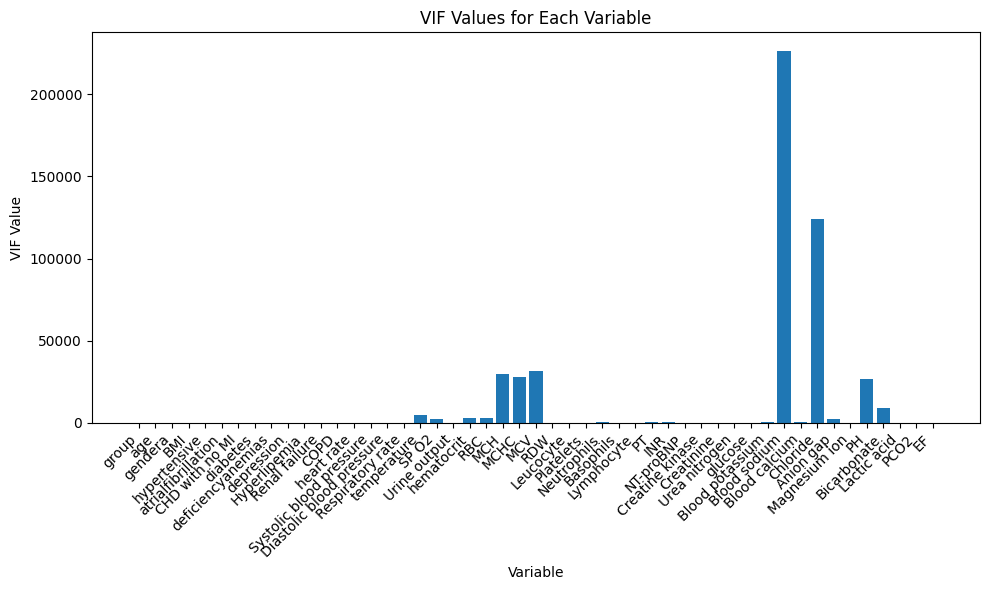

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create the feature matrix X by excluding the 'ID' and 'outcome' columns
X = data.drop(['ID', 'outcome'], axis=1)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print("VIF values:")
print(vif_data)

# Create a bar plot for VIF values
plt.figure(figsize=(10, 6))
plt.bar(vif_data["Variable"], vif_data["VIF"])
plt.title("VIF Values for Each Variable")
plt.xlabel("Variable")
plt.ylabel("VIF Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [31]:
columns_to_drop_vif = vif_data[vif_data['VIF'] > 5]['Variable'].tolist()
df = data.drop(columns=columns_to_drop_vif)
df

,ID,outcome,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,Urine output,Basophils,NT-proBNP,Creatine kinase
0,125047,0.0,0,0,0,1,1,0,1,1,0,2155.0,0.40,1956.0,148.000000
1,139812,0.0,0,0,0,0,1,0,0,0,1,1425.0,0.20,2384.0,60.600000
2,109787,0.0,0,0,0,0,1,0,0,1,0,2425.0,0.55,4081.0,16.000000
3,130587,0.0,0,0,0,0,0,0,0,0,0,8760.0,0.15,668.0,85.000000
4,138290,0.0,1,0,0,0,1,0,0,1,1,4455.0,0.20,30802.0,111.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,171130,0.0,1,1,0,1,0,1,1,1,0,1305.0,0.70,47985.0,129.500000
1173,101659,0.0,0,1,0,1,0,1,1,1,0,1305.0,0.80,48044.0,34.000000
1174,162069,0.0,1,1,0,1,1,0,0,1,0,118.0,0.40,50976.0,98.000000
1175,120967,0.0,0,0,1,1,1,1,1,1,0,2585.0,0.30,59701.0,24.333333


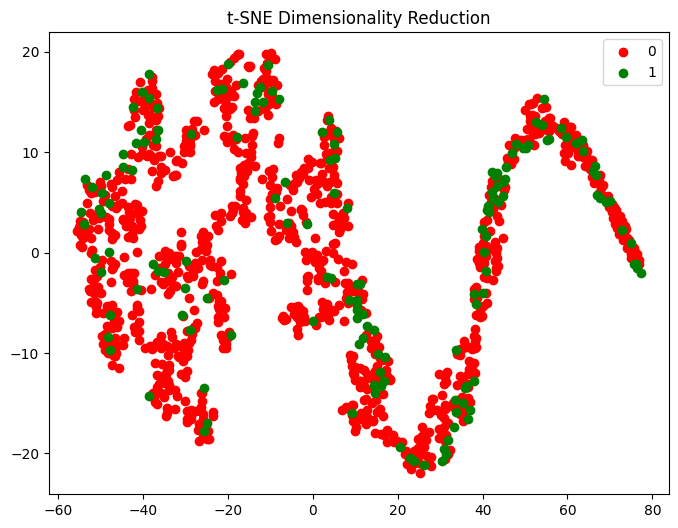

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# Load a sample dataset (you can replace this with your own dataset)
X = data.drop(['ID', 'outcome'], axis=1)
y = data["outcome"]

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(len(np.unique(y))):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=str(i))

plt.title('t-SNE Dimensionality Reduction')
plt.legend()
plt.show()

# Modeling



In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.metrics import Precision, Recall, AUC
from xgboost import XGBClassifier, plot_tree, plot_importance
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score


In [34]:
X = filtered_data

Y=data['outcome']

### standardization

In [35]:
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data

In [36]:
print(X.shape)


(1177, 40)


In [37]:
y.value_counts()

outcome
0.0    1018
1.0     159
Name: count, dtype: int64

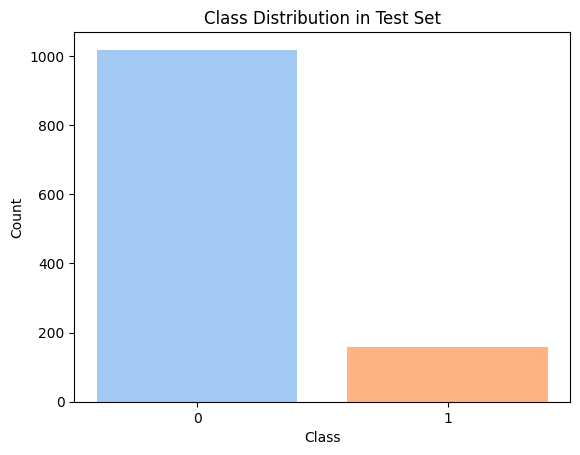

In [38]:

# Assuming you have the test set labels
# ...

# Count the occurrences of each class
class_counts = y.value_counts()

# Set colors for each class using a rose color palette
class_colors = sns.color_palette("pastel", n_colors=len(class_counts))

# Bar chart for class distribution
plt.bar(class_counts.index, class_counts, color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Test Set')

# Set x-ticks to only 0 and 1
plt.xticks([0, 1])

plt.show()


## Handling Imabalanced Data using SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

In [40]:
X_sm,y_sm=smote.fit_resample(X,y)

In [41]:
X_sm.shape

(2036, 40)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, train_size = 0.70, test_size = 0.30, random_state = 109)


In [43]:

print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)


X_Train Shape: (1425, 40)
X_Test Shape: (611, 40)


In [44]:
y_train.value_counts()

outcome
0.0    715
1.0    710
Name: count, dtype: int64

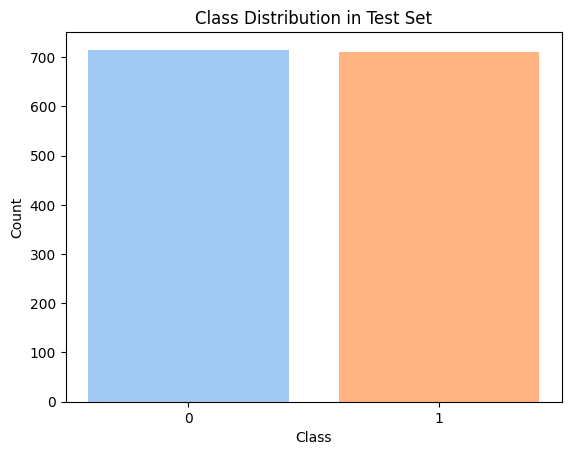

In [45]:

# Count the occurrences of each class
class_counts = y_train.value_counts()

# Set colors for each class using a rose color palette
class_colors = sns.color_palette("pastel", n_colors=len(class_counts))

# Bar chart for class distribution
plt.bar(class_counts.index, class_counts, color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Test Set')

# Set x-ticks to only 0 and 1
plt.xticks([0, 1])

plt.show()


### ClassifierMetricsVisualizer

In [46]:

from scipy.stats import randint 
from collections import Counter
from statsmodels.formula.api import ols
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import display_html 
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from scipy.stats import randint 
from collections import Counter

class ReusableUtils():
    
    def Generate_Model_Test_Classification_Report(self, model, X_test, y_test, model_name=""):

        y = 1.05
        # Report Title & Classification Mterics Abbreviations...
        fig, axes = plt.subplots(3, 1, figsize = (8, 3))
        axes[0].text(9, 1.8, " MODEL TEST REPORT", fontsize=30, horizontalalignment='center', 
                     color='DarkBlue', weight = 'bold')

        axes[0].axis([0, 10, 0, 10])
        axes[0].axis('off')

        axes[1].text(9, 4, "Model Name: " + model_name, style='italic', 
                             fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')

        axes[2].text(0, 4, "* 1 - Not Survived\t\t\t\t\t\t\t * 0 - Survived\n".expandtabs() +
                     "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                     "* ROC - Receiver Operating Characteristics     " + 
                     "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(), 
                     style='italic', fontsize=10, horizontalalignment='left', color='orangered')

        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')

        scores = []
        metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
                   'AUC_ROC  ', 'AUC_PR   ']

        # Plot ROC and PR curves using all models and test data...
        y_pred = model.predict(X_test)
        y_pred_probs = model.predict_proba(X_test)[:, 1:]

        fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred)
        precision, recall, th = precision_recall_curve(y_test.values.ravel(), y_pred_probs)

        # Calculate the individual classification metic scores...
        model_f1_score = f1_score(y_test, y_pred)
        model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
        model_precision_score = precision_score(y_test, y_pred)
        model_recall_score = recall_score(y_test, y_pred)
        model_accuracy_score = accuracy_score(y_test, y_pred)
        model_auc_roc = auc(fpr, tpr)
        model_auc_pr = auc(recall, precision)

        scores.append([model_f1_score,
                       model_matthews_corrcoef_score,
                       model_precision_score,
                       model_recall_score,
                       model_accuracy_score,
                       model_auc_roc,
                       model_auc_pr])

        sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
        for i in range(len(scores[0])):
            sampling_results.loc[i] = [metrics[i], scores[0][i]]

        sampling_results.index = np.arange(1, len(sampling_results) + 1)

        class_report = classification_report(y_test, y_pred)
        conf_matx = confusion_matrix(y_test, y_pred)

        # Display the Confusion Matrix...
        fig, axes = plt.subplots(1, 3, figsize = (20, 4))
        sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
        axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold', 
                          style='italic', loc='left', y=y)

        # Classification Metrics
        axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic', 
                     fontsize=20, horizontalalignment='center')
        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')
        axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold', 
                          style='italic', loc='center', y=y)

        # Classification Report
        axes[2].text(0, 1, class_report, style='italic', fontsize=20)
        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')
        axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold', 
                          style='italic', loc='center', y=y)

        plt.tight_layout()
        plt.show()

        # AUC-ROC & Precision-Recall Curve
        fig, axes = plt.subplots(1, 2, figsize = (14, 4))

        axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
        axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

        axes[0].plot([0, 1], [0, 1], 'k--')
        axes[0].legend(loc = "lower right")
        axes[0].set_xlabel("False Positive Rate")
        axes[0].set_ylabel("True Positive Rate")
        axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                          style='italic', loc='center', pad=1, y=y)

        axes[1].legend(loc = "lower left")
        axes[1].set_xlabel("Recall")
        axes[1].set_ylabel("Precision")
        axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                          style='italic', loc='center', pad=3, y=y)

        plt.subplots_adjust(top=0.95) 
        plt.tight_layout()
        plt.show()
        
        return None

In [47]:
utils = ReusableUtils()

## First Model: Decision Tree Model

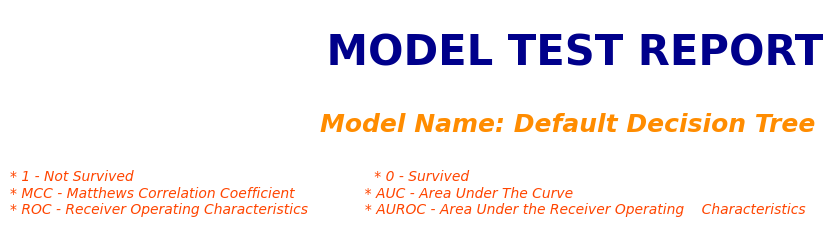

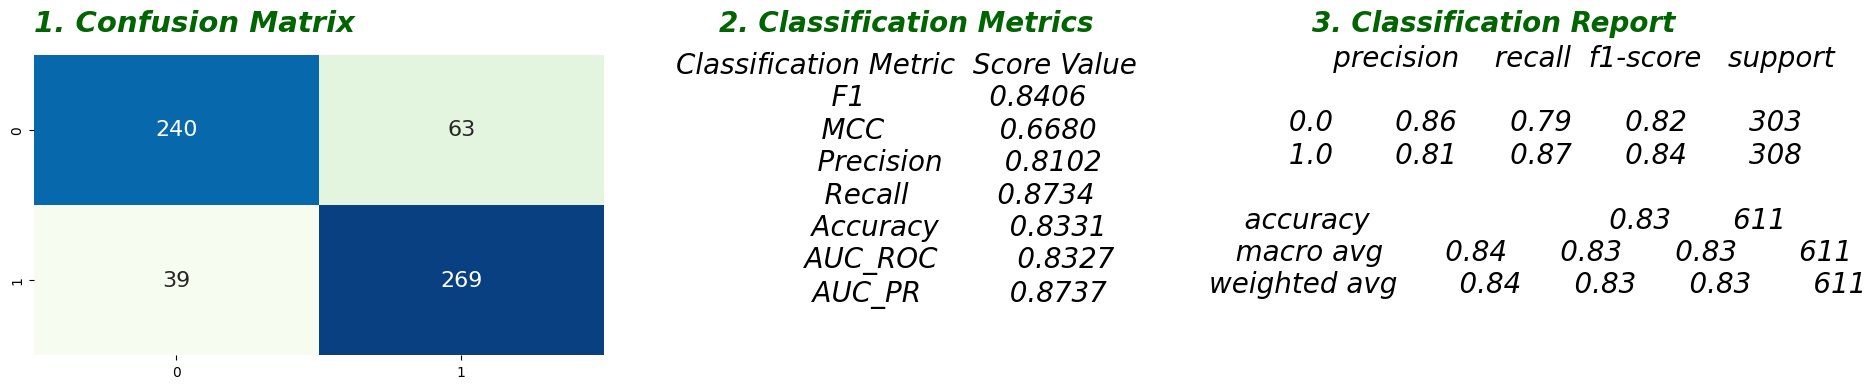

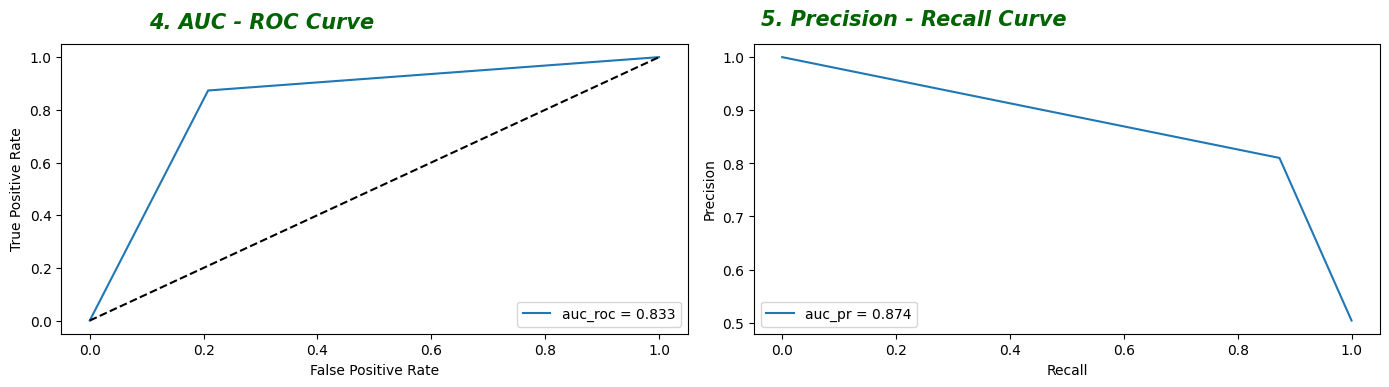

In [48]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train, y_train)

#tree_pred = tree.predict(X_test)

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default Decision Tree")

### Second Model : XGBoost

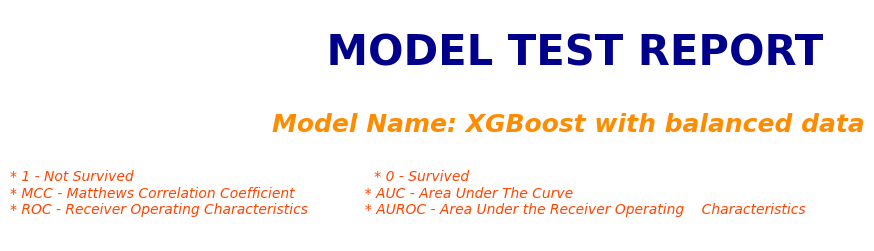

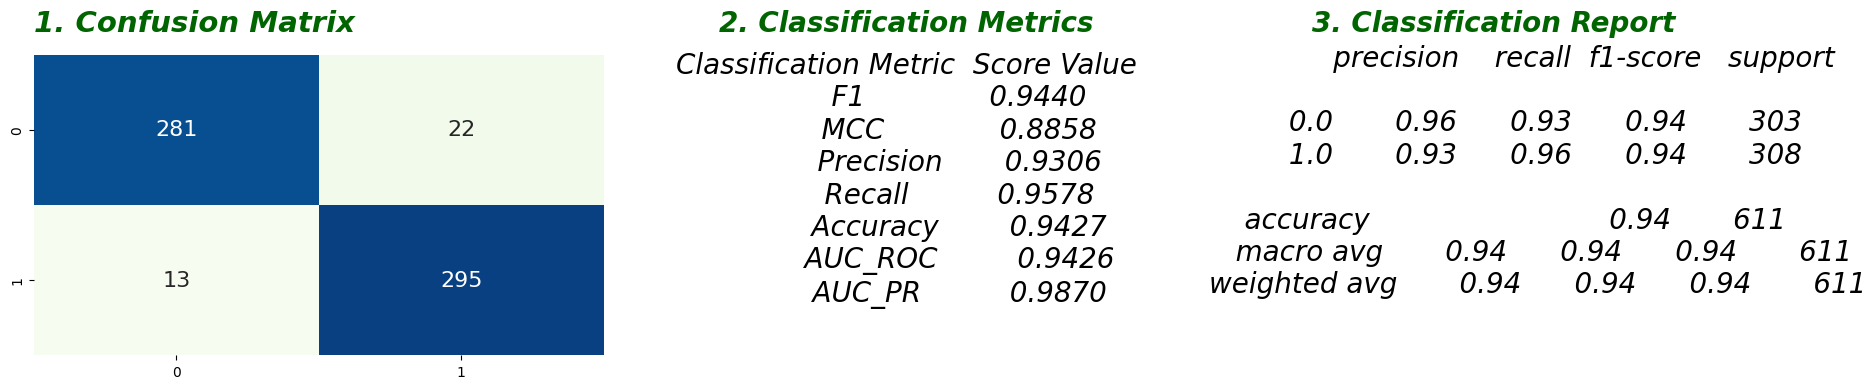

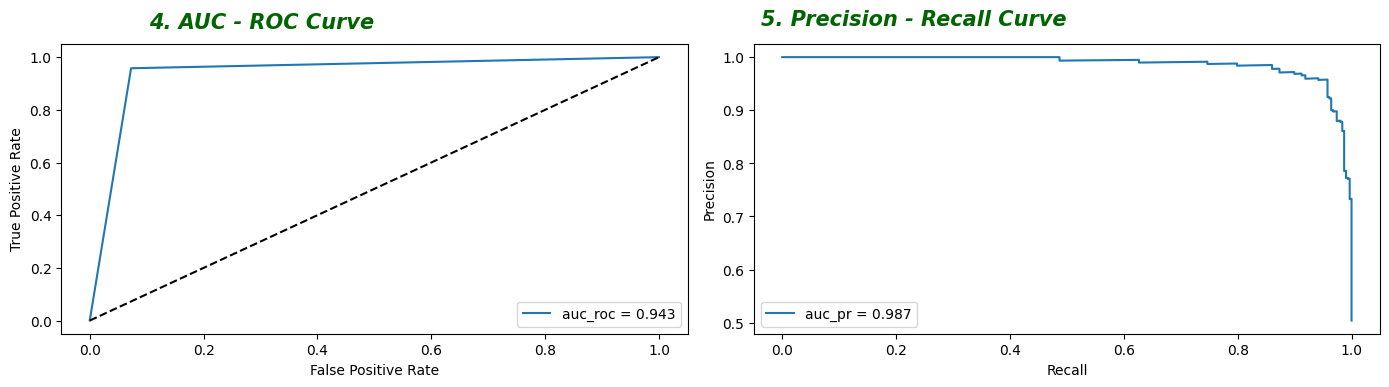

In [49]:
xgb_best = XGBClassifier(random_state=123, seed=100)
xgb_best.fit(X_train, y_train)
utils.Generate_Model_Test_Classification_Report(xgb_best, X_test, y_test, model_name="XGBoost with balanced data")

## Combining the Models

### Stacking Method

In [50]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
xgb_classifier = XGBClassifier()
dt_classifier = DecisionTreeClassifier()

In [52]:
bal_stacking_classifier = StackingClassifier(
    estimators=[ ('xgb', xgb_classifier), ('dt', dt_classifier)],
    final_estimator=RandomForestClassifier(n_estimators=20),
    stack_method='auto'
)

In [53]:
# Train the stacking model
bal_stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...n=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier(n_estimators=20))

In [54]:
# Make predictions
y_pred_bal_stacking = bal_stacking_classifier.predict(X_test)

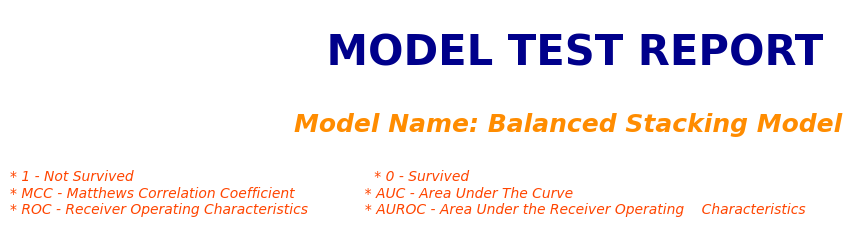

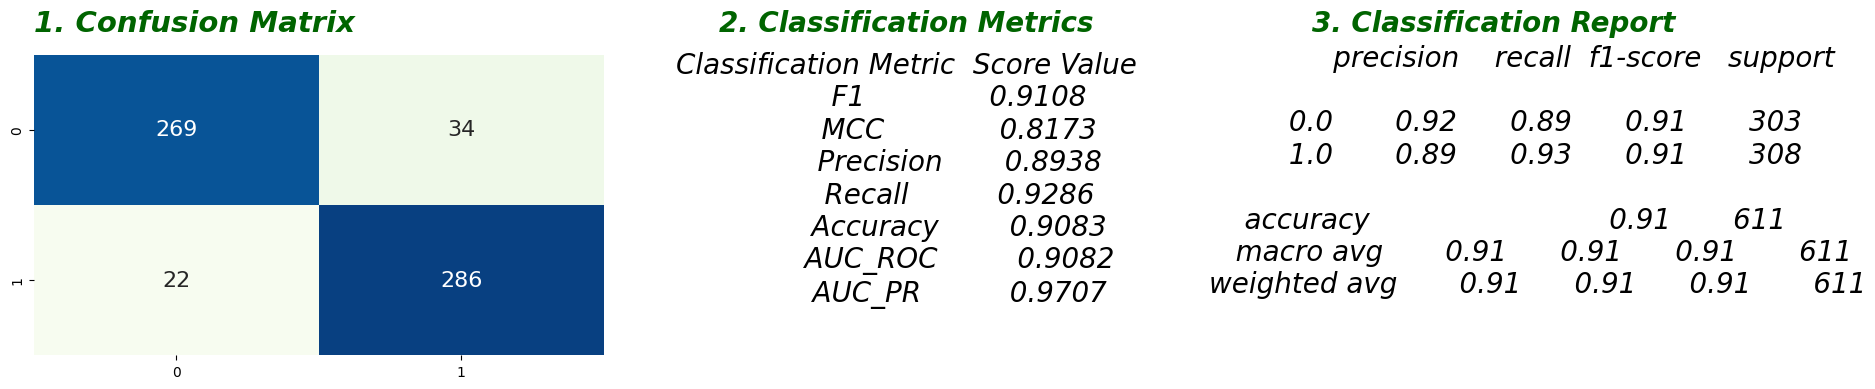

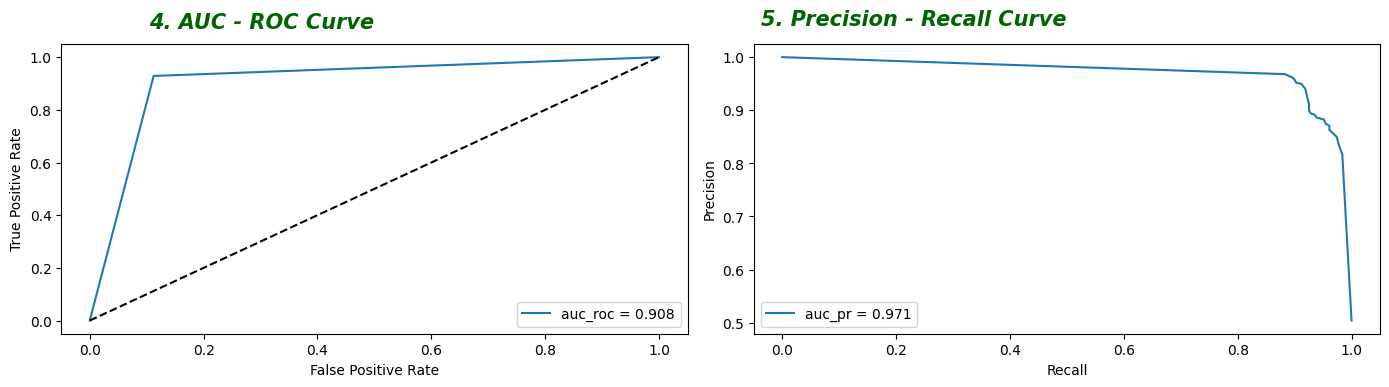

In [55]:
utils.Generate_Model_Test_Classification_Report(bal_stacking_classifier, X_test, y_test, model_name="Balanced Stacking Model")

## Third Model : SVM

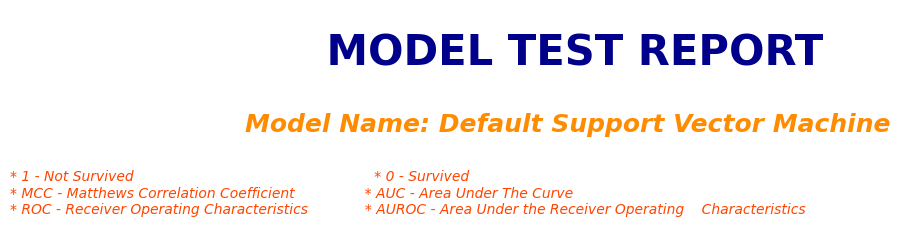

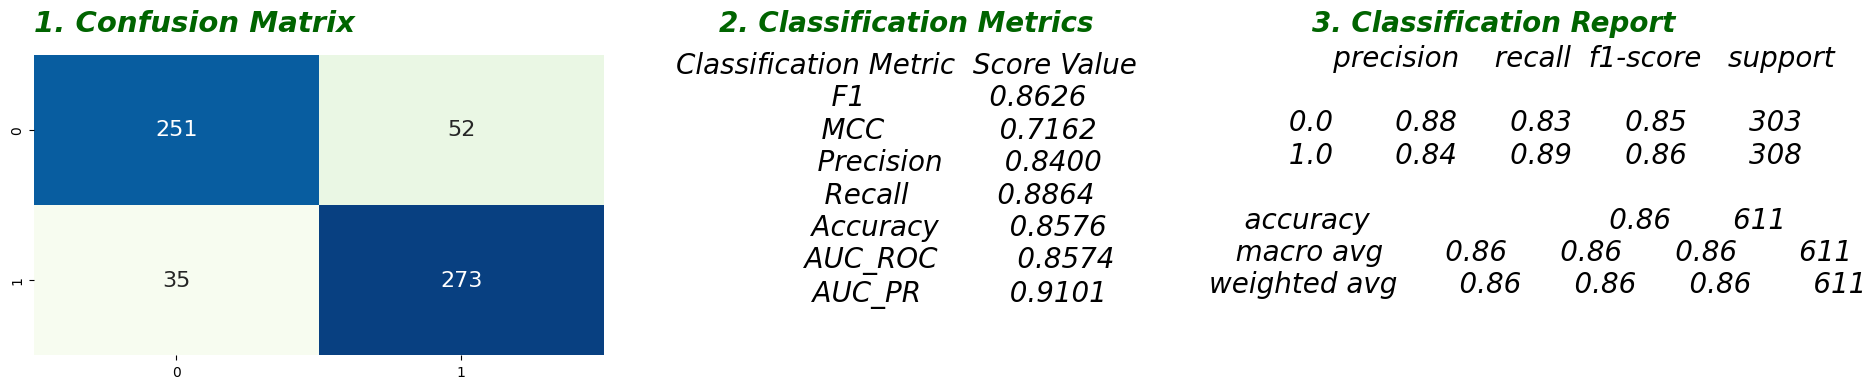

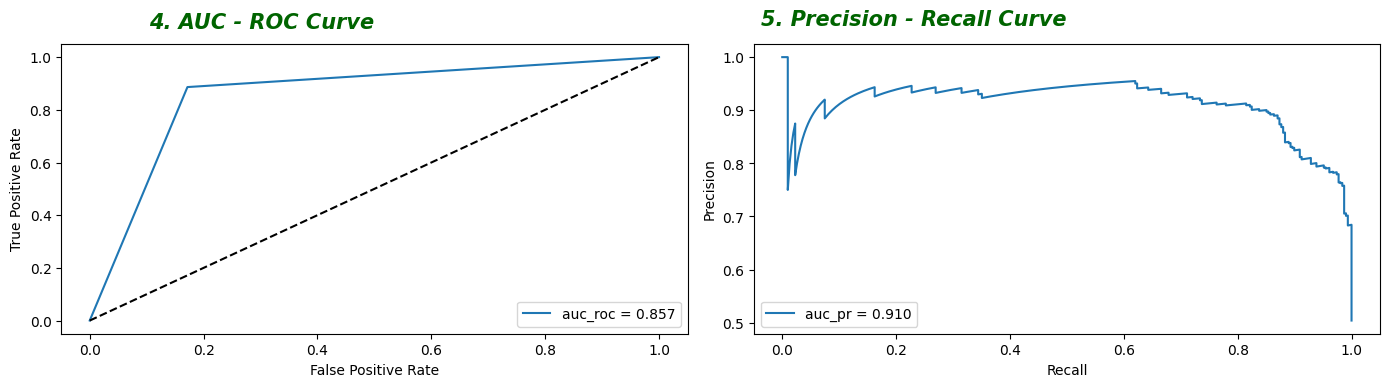

In [56]:
# SVM with Default Parameters 

svm = SVC(C=1, gamma=0.01,kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train, y_train)

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(svm, X_test, y_test, model_name="Default Support Vector Machine")

### Fine-Tuning the SVM Model using GridSearchCV

In [57]:
# GridSearchCV to find best parameters for svm
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

# parameters to build the model on
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                  scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 2)

# fitting the model for grid search 
grid_search.fit(X_train, y_train)
    
# get the best parameter from gird search 
print("Best Parameters:", grid_search.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", grid_search.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 10, 'gamma': 0.1}

Best Classifier: SVC(C=10, gamma=0.1, probability=True, random_state=100)


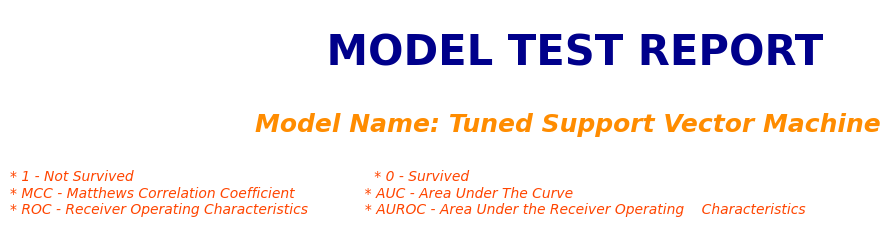

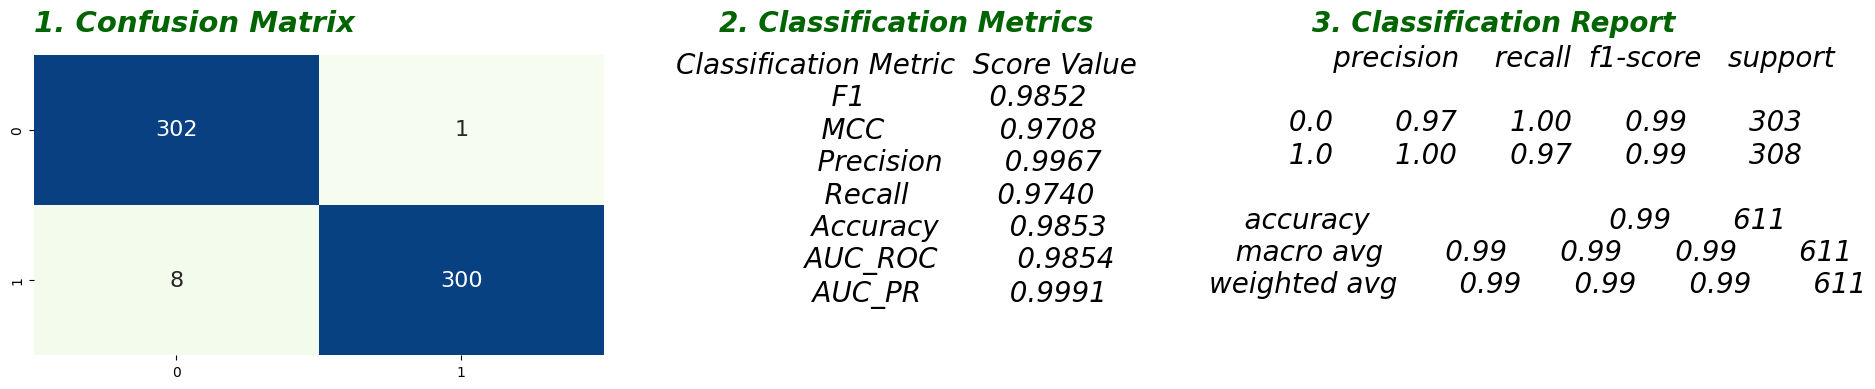

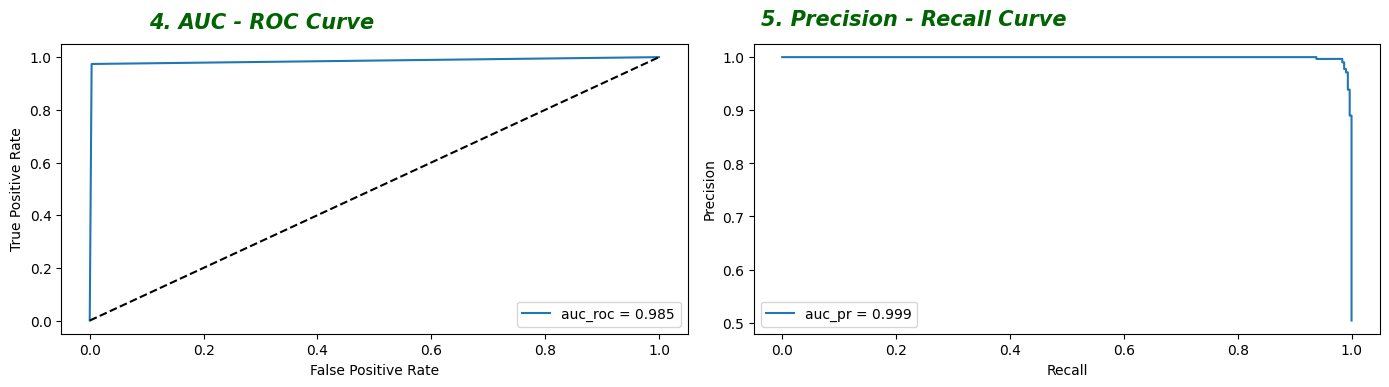

In [58]:
best_svc = grid_search.best_estimator_

best_svc.fit(X_train, y_train)


# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_svc, X_test, y_test, model_name="Tuned Support Vector Machine")

In [59]:
# Create models
best_tree = tree.fit(X_train, y_train)
best_svc =best_svc.fit(X_train, y_train)
best_xgb =xgb_best.fit(X_train, y_train)


y_pred_tree = best_tree.predict(X_test)
y_pred_svc = best_svc.predict(X_test)
y_pred_xgb=best_xgb.predict(X_test)

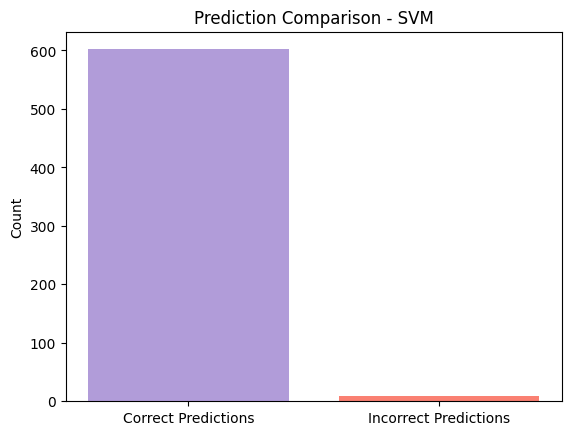

In [60]:

# Create a DataFrame to store prediction results
results_df = pd.DataFrame({'True Label': y_test, 'SVM Prediction': y_pred_svc, 'Tree Prediction': y_pred_tree, 'XGBoost Prediction': y_pred_xgb})

# Count the occurrences of correct and incorrect predictions
correct_predictions = results_df[results_df['True Label'] == results_df['SVM Prediction']]
incorrect_predictions = results_df[results_df['True Label'] != results_df['SVM Prediction']]

# Set colors for correct and incorrect predictions
correct_color = '#B19CD9'
incorrect_color = 'salmon'

# Bar chart for prediction comparison - SVM
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [len(correct_predictions), len(incorrect_predictions)], color=[correct_color, incorrect_color])
plt.ylabel('Count')
plt.title('Prediction Comparison - SVM')
plt.show()


### comparing models by visualization

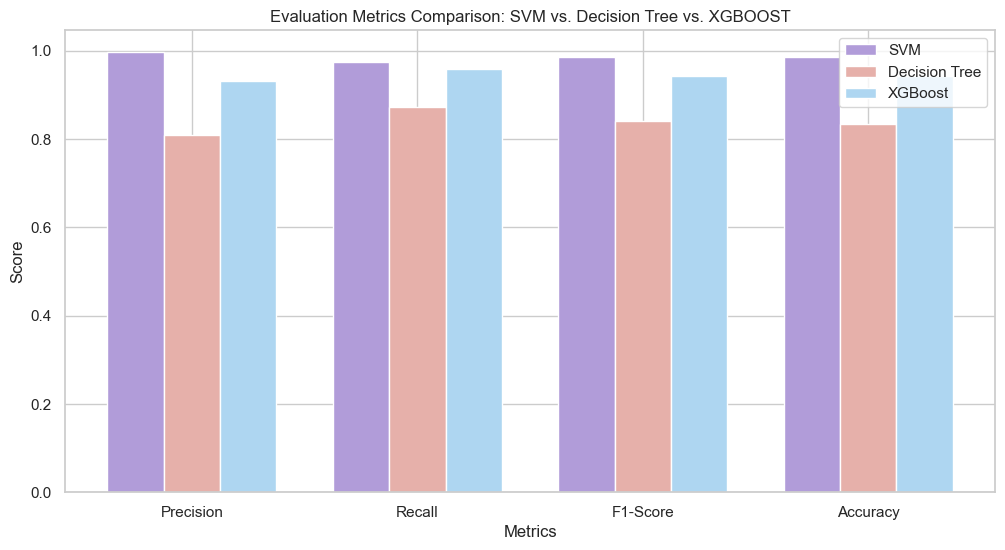

In [61]:
svm_precision = precision_score(y_test, y_pred_svc)
svm_recall = recall_score(y_test, y_pred_svc)
svm_f1 = f1_score(y_test, y_pred_svc)
svm_accuracy = accuracy_score(y_test, y_pred_svc)

tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)


# Set pastel colors
mauve_color = '#B19CD9'
rose_color = '#E6B0AA'

# Visualize the results using a grouped bar chart with pastel colors
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

bar_width = 0.25
index = np.arange(4)

# Bar chart for SVM
plt.bar(index, [svm_precision, svm_recall, svm_f1,svm_accuracy], bar_width, label='SVM', color=mauve_color)
# Bar chart for Decision Tree
plt.bar(index + bar_width, [tree_precision, tree_recall, tree_f1,tree_accuracy], bar_width, label='Decision Tree', color=rose_color)

xgb_color = '#AED6F1'  # Choose a color for XGBoost bars
plt.bar(index + 2 * bar_width, [xgb_precision, xgb_recall, xgb_f1, xgb_accuracy], bar_width, label='XGBoost', color=xgb_color)



plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics Comparison: SVM vs. Decision Tree vs. XGBOOST')
plt.xticks(index  + bar_width, ['Precision', 'Recall', 'F1-Score',"Accuracy"])
plt.legend()
plt.show()


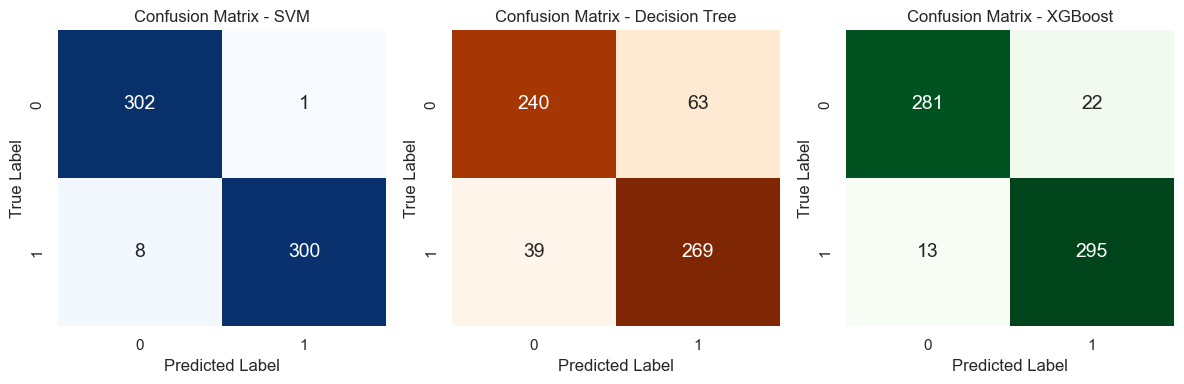

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrices for each classifier
cm_svm = confusion_matrix(y_test, y_pred_svc)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix heatmaps
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Oranges", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


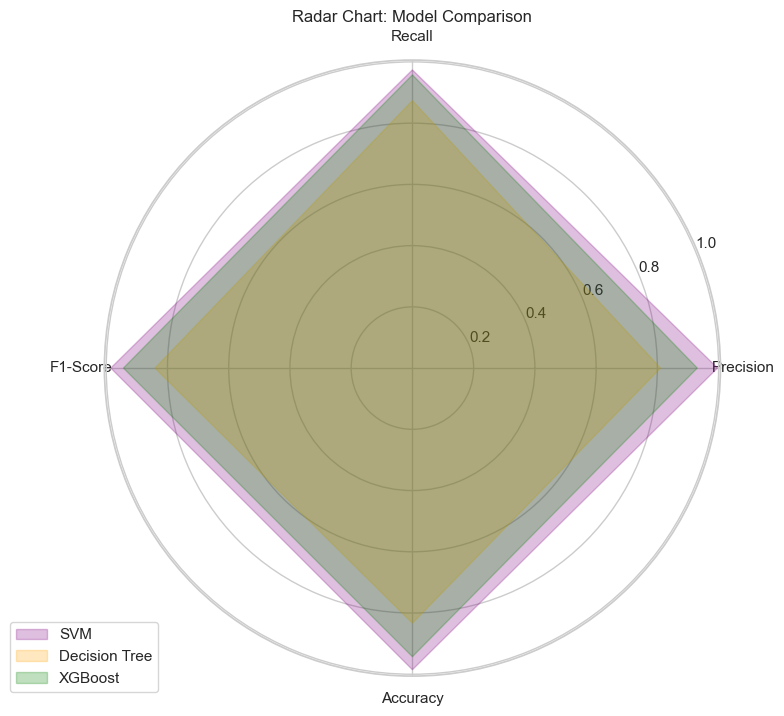

In [63]:

# Set colors
colors = ['purple', 'orange', 'green']

# Set metrics and classifiers
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
classifiers = ['SVM', 'Decision Tree', 'XGBoost']

# Create data for radar chart
svm_data = [svm_precision, svm_recall, svm_f1, svm_accuracy]
tree_data = [tree_precision, tree_recall, tree_f1, tree_accuracy]
xgb_data = [xgb_precision, xgb_recall, xgb_f1, xgb_accuracy]

# Set up angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, svm_data, color=colors[0], alpha=0.25, label='SVM')
ax.fill(angles, tree_data, color=colors[1], alpha=0.25, label='Decision Tree')
ax.fill(angles, xgb_data, color=colors[2], alpha=0.25, label='XGBoost')

# Add labels and legend
ax.set_thetagrids(angles * 180/np.pi, metrics)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Radar Chart: Model Comparison')
plt.show()


In [64]:
# Apply PCA
pca = PCA(n_components=2)
pca_features=pca.fit_transform(features_scaled)


# Clustering

In [65]:
# Create dict to store results of clustering algorithms for comparision
best_model = pd.DataFrame({'Model':[], 'Sil_score':[], 'CH_score':[], 'setting':[]})

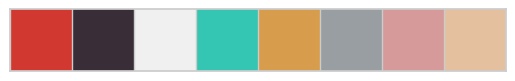

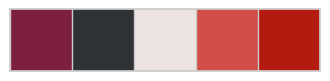

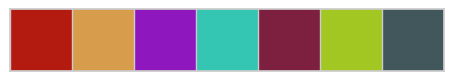

In [66]:
import seaborn as sns

def custom_palette(custom_colors):
    """Show color palette that use in this notebook"""
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

 # for plot title
FONT = {'fontsize':30, 'fontstyle':'normal', 'fontfamily':'Georgia', 'backgroundcolor':'#B41B10', 'color':'#E4C09E'}

# Create List of Color Palletes
colors1 = ["#D1382F", "#392E37", "#F1F0F0", "#34C5B3", "#D79C4C", "#999EA2", "#D59A99", "#E4C09E"]
colors2 = ["#7D1F3F","#303336","#ECE3E2","#D24E49","#B41B10"]
dark_colors = ["#B41B10", "#D79C4C", "#8e18be", "#34C5B3", "#7D1F3F", "#a2c723", "#42575B"]
# Plot Color Palletes
for color in [colors1, colors2, dark_colors]:
    custom_palette(color)

In [67]:
def plot_evaluation(sh_score, ch_score, name, x=range(2,11)):
    """
    for draw evaluation plot include silhouette_score and calinski_harabasz_score.
        sh_score(list): include silhouette_score of models
        ch_score(list): include calinski_harabasz_score of models
        name(string): name of clustering algorithm
        x(list): has range of number for x axis
    """
    
    fig, ax = plt.subplots(1,2,figsize=(15,7), dpi=100)
    ax[0].plot(x, sh_score, color=dark_colors[0], marker='o', ms=9, mfc=dark_colors[-1])
    ax[1].plot(x, ch_score, color=dark_colors[0], marker='o', ms=9, mfc=dark_colors[-1])
    ax[0].set_xlabel("Number of Clusters", labelpad=20)
    ax[0].set_ylabel("Silhouette Coefficient", labelpad=20)
    ax[1].set_xlabel("Number of Clusters", labelpad=20)
    ax[1].set_ylabel("calinski Harabasz Coefficient", labelpad=20)
    plt.suptitle(f'Evaluate {name} Clustering',y=0.9, **FONT)
    plt.tight_layout(pad=3)
    plt.show()

## Birch clustering

In [68]:
# Check optimom n_clusters for implement birch by using silhouette and calinski coefficient
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score 
from kneed import KneeLocator
from sklearn import metrics

silhouette_coef = []
for k in range(2,11):
    birch = Birch(n_clusters=k, threshold=0.0001)
    birch.fit(pca_features)
    score = silhouette_score(pca_features, birch.labels_)
    silhouette_coef.append(score)

calinski_harabasz_coef = []
for k in range(2,11):
    birch = Birch(n_clusters=k, threshold=0.0001)
    birch.fit(pca_features)
    score = calinski_harabasz_score(pca_features, birch.labels_)
    calinski_harabasz_coef.append(score)

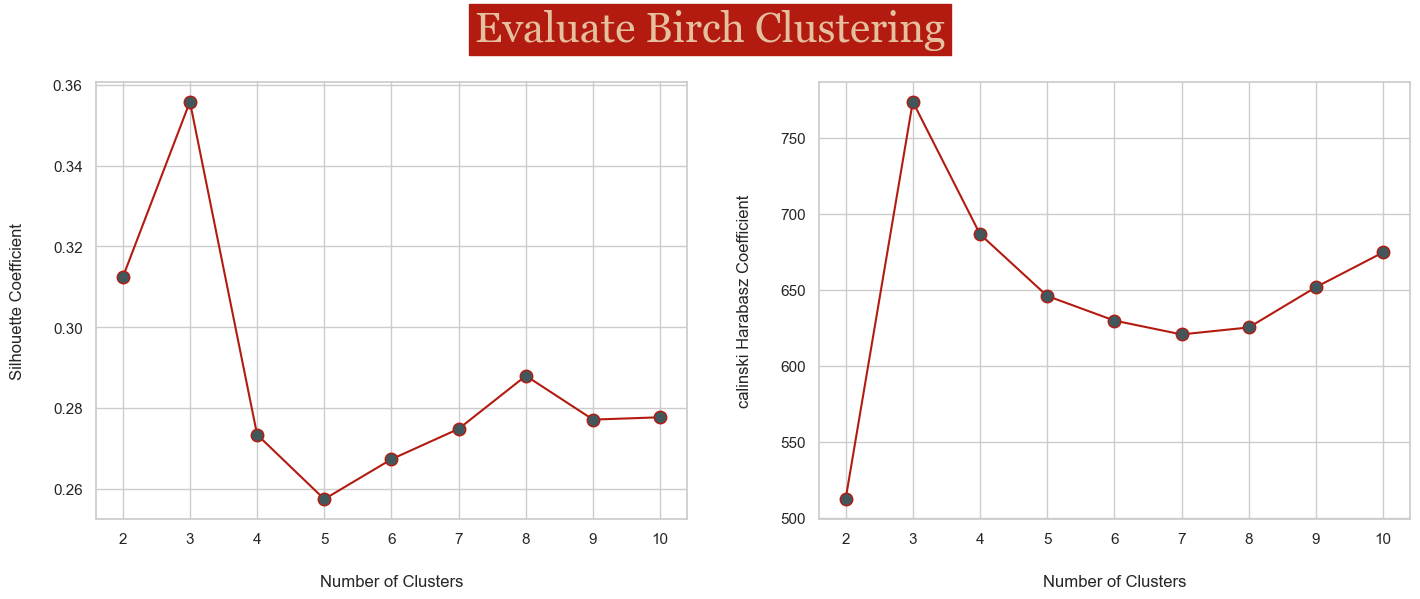

In [69]:
plot_evaluation(silhouette_coef, calinski_harabasz_coef, 'Birch')

In [70]:
# Implement Birch algorithm
birch = Birch(n_clusters=3, threshold=0.0001)
birch.fit(pca_features)
# Store result of Birch
pred = birch.labels_

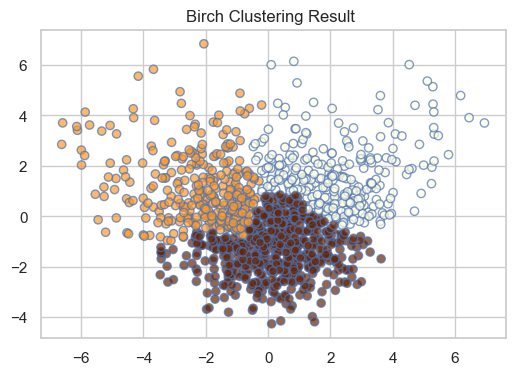

In [71]:
# Creating a scatter plot
plt.figure(figsize=(6, 4))  
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=pred, cmap='YlOrBr_r', alpha=0.7, edgecolors='b')
plt.title('Birch Clustering Result ')
plt.show()

In [72]:
score_br = metrics.silhouette_score(pca_features,pred)
print("Score of Birch = ", score_br)


Score of Birch =  0.3558126738500132


In [73]:
# Store results obtained from Birch
best_model.loc[len(best_model.index)] = [
    f"BIRCH",
    silhouette_score(pca_features, pred),
    calinski_harabasz_score(pca_features, pred),
    {"n_clusters":3, "threshold":0.0001}]

## k-means clustering

In [74]:
from sklearn.cluster import KMeans
# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
# Find inertia for k cluster
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pca_features)
    inertias.append(kmeans.inertia_)

In [75]:
from kneed import KneeLocator
def elbow_optimizer(inertias,name):
    """ Find optimom k for clustering algorithm
        inertias (list): list that has inertia for each selected k
        name (string): name of clustering algorithm
    """

    kl = KneeLocator(range(1,11), inertias, curve='convex', direction="decreasing")
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(1,11), y=inertias, color=dark_colors[0])
    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20)
    plt.ylabel("Inertia", labelpad=20)
    plt.title(f"Elbow Method for {name}", y=1.09, fontdict=FONT)
    plt.axvline(x=kl.elbow, color=dark_colors[-1], label='axvline-fullheight', ls='--')
    plt.show()

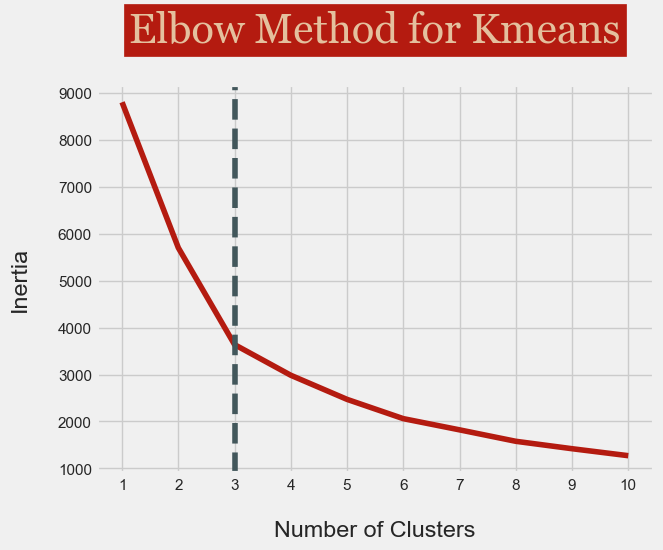

In [76]:
elbow_optimizer(inertias, 'Kmeans')

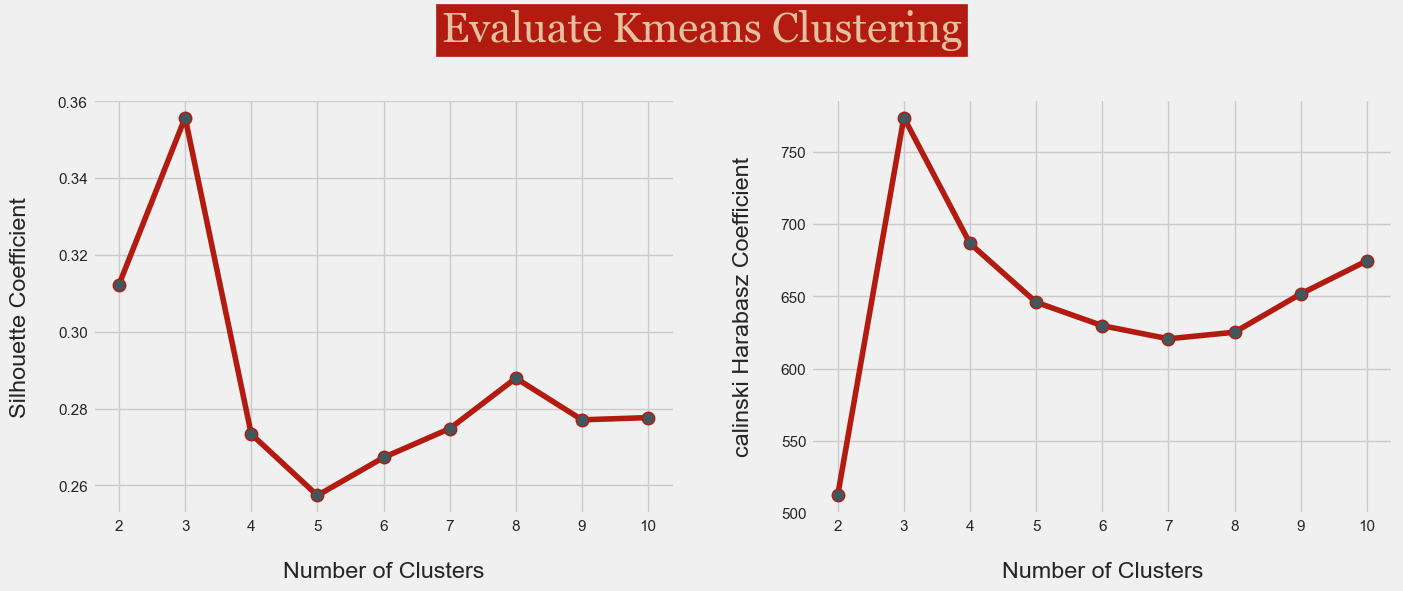

In [77]:
plot_evaluation(silhouette_coef, calinski_harabasz_coef, 'Kmeans')


<function matplotlib.pyplot.show(close=None, block=None)>

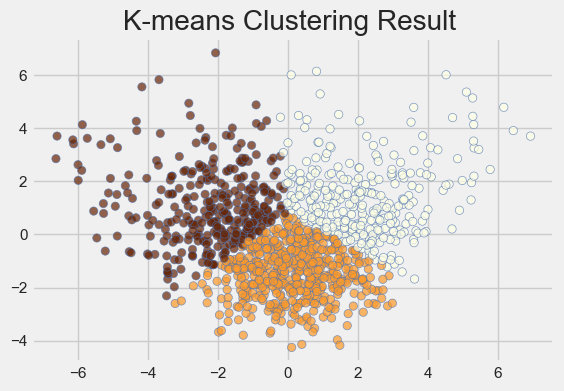

In [78]:
# Implement kmeans for n_clusters=3
kmeans = KMeans(n_clusters=3, **kmeans_set).fit(pca_features)
# Store result of kmeans
pred = kmeans.labels_
plt.figure(figsize=(6, 4))  
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=pred,cmap="YlOrBr_r",alpha=.7,edgecolors="b") 
plt.title('K-means Clustering Result ')
plt.show


In [79]:
# Store resluts of kmeans
best_model.loc[len(best_model.index)] = [
    f"Kmeans",
    silhouette_score(pca_features, pred),
    calinski_harabasz_score(pca_features, pred),
    {"n_clusters":3, **kmeans_set}]

## Hierarchical Clustering 
### The dendrogram is a tree-like diagram that illustrates the arrangement of clusters produced by the hierarchical clustering algorithm. It shows how data points are merged at each step and can help you decide on the number of clusters by looking at the vertical lines where they cross. More the distance of the vertical lines in the dendrogram, more the distance between the clusters.

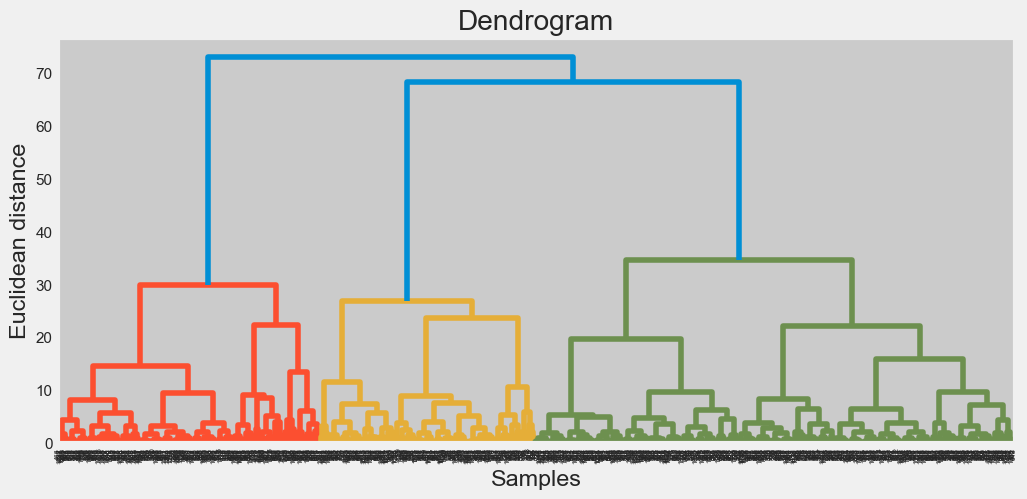

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a dendrogram
linkage_matrix = linkage(pca_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(11, 5))
dendrogram(linkage_matrix, orientation="top",  show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distance')
plt.show()

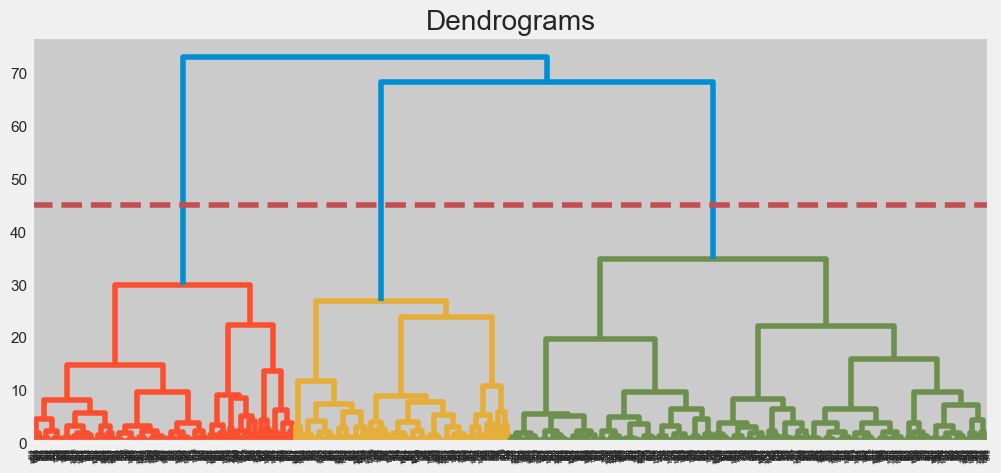

In [81]:
plt.figure(figsize=(11, 5))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(pca_features, method='ward'))
plt.axhline(y=45, color='r', linestyle='--')

### To determine the number of clusters 
#### We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold so that it cuts the tallest vertical line). Let’s set this threshold as 45 and draw a horizontal line. 

In [82]:

# Find optimom bandwidth for implement agglomerative clustering by using silhouette and calinski coefficient
silhouette_coef = []
for k in range(2,15):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(pca_features)
    score = silhouette_score(pca_features, agg.fit_predict(pca_features))
    silhouette_coef.append(score)

calinski_harabasz_coef = []
for k in range(2,15):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(pca_features)
    score = calinski_harabasz_score(pca_features, agg.fit_predict(pca_features))
    calinski_harabasz_coef.append(score)

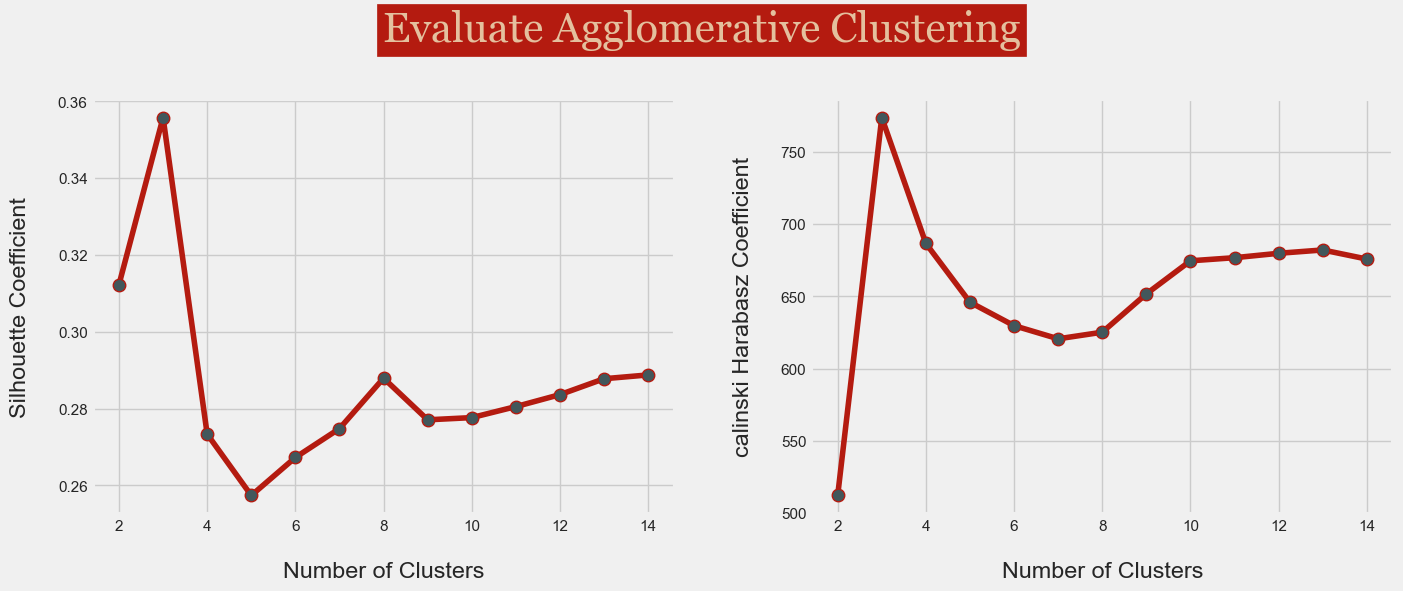

In [83]:
# Draw plots of silhouette_score and calinski_harabasz_score for AgglomerativeClustering models
plot_evaluation(silhouette_coef, calinski_harabasz_coef, 'Agglomerative', x=range(2,15))

In [84]:
# Perform hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(pca_features)


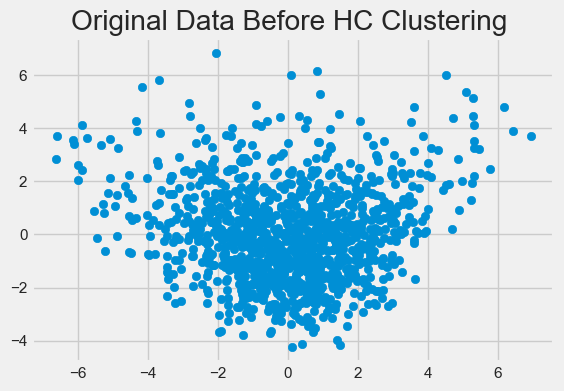

In [85]:
plt.figure(figsize=(6, 4))  
plt.scatter(x=pca_features[:, 0],  y=pca_features[:, 1])
plt.title('Original Data Before HC Clustering ')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

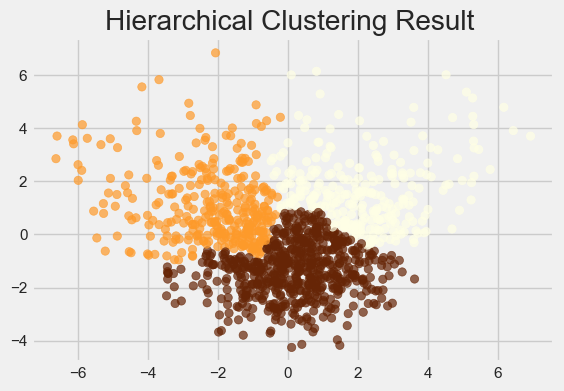

In [86]:
plt.figure(figsize=(6, 4))  
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters,alpha=.7,cmap="YlOrBr_r") 
plt.title('Hierarchical Clustering Result ')
plt.show

In [87]:
# Store results obtained from AgglomerativeClustering
best_model.loc[len(best_model.index)] = [
    f"Agglomerative",
    silhouette_score(pca_features, clusters),
    calinski_harabasz_score(pca_features, clusters),
    {"n_clusters":3}]

In [88]:
best_model

,Model,Sil_score,CH_score,setting
0,BIRCH,0.355813,773.823180,"{'n_clusters': 3, 'threshold': 0.0001}"
1,Kmeans,0.370080,833.633518,"{'n_clusters': 3, 'init': 'random', 'n_init': ..."
2,Agglomerative,0.355813,773.823180,{'n_clusters': 3}


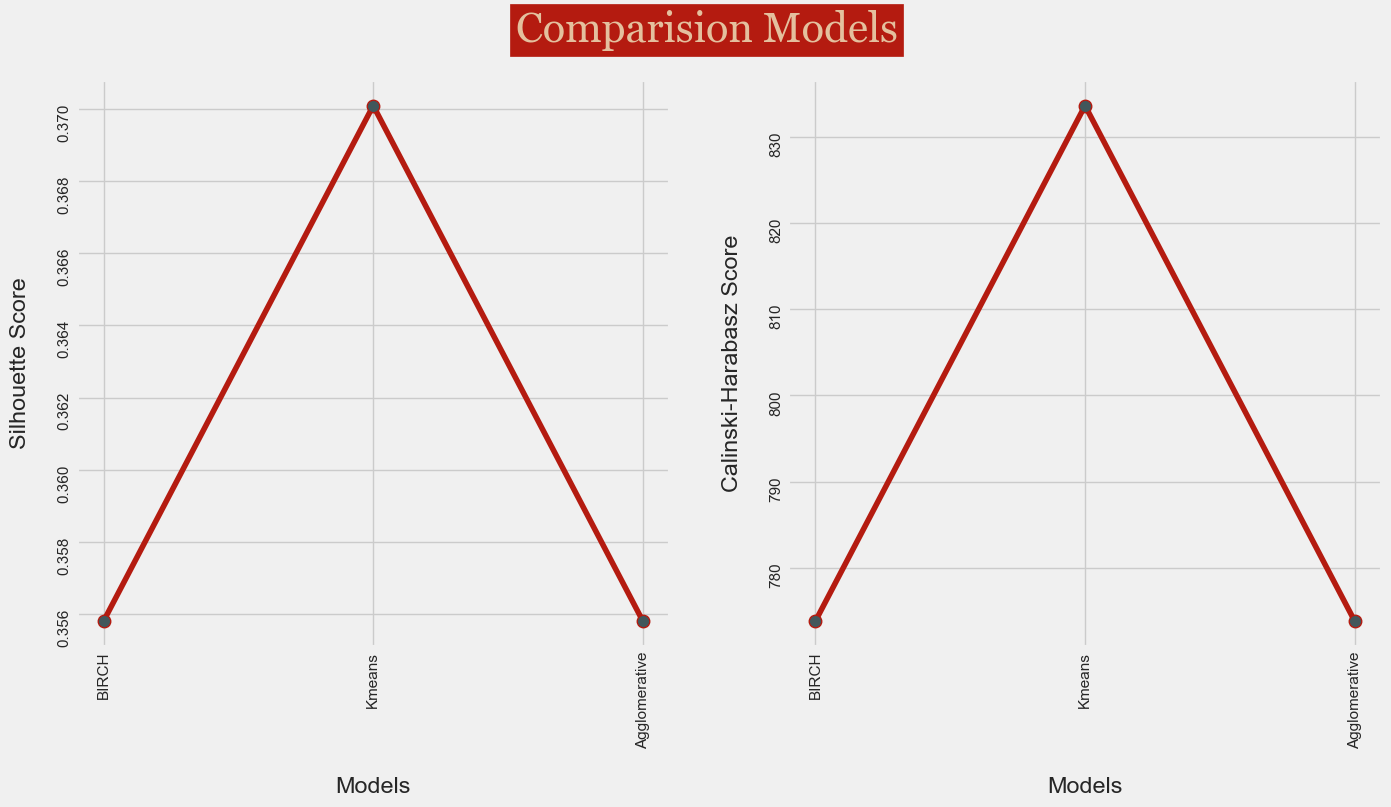

In [89]:
# Show results obtained from different models in plot
fig, ax = plt.subplots(1,2,figsize=(15,7), dpi=100)
ax[0].plot(best_model.Model, best_model.Sil_score, marker='o', c=dark_colors[0], ms=9, mfc=dark_colors[-1])
ax[1].plot(best_model.Model, best_model.CH_score, marker='o', c=dark_colors[0], ms=9, mfc=dark_colors[-1])
ax[0].set_xlabel("Models", labelpad=20)
ax[0].set_ylabel("Silhouette Score", labelpad=20)
ax[1].set_xlabel("Models", labelpad=20)
ax[1].set_ylabel("Calinski-Harabasz Score", labelpad=20)
ax[0].tick_params(labelrotation=90) 
ax[1].tick_params(labelrotation=90) 
plt.suptitle(f'Comparision Models', **FONT)
plt.show()

### we conclude the the K-mean clustering in the best according to silhouette_score and calinski_harabasz_score

## With our dataset labeled as 1s and 0s, we're diving into clustering to group similar data points. The plan is to see how well these clusters align with the actual data labels, 

In [90]:
kmeans = KMeans(n_clusters=2, **kmeans_set).fit(pca_features)
# Store result of kmeans
pred = kmeans.labels_

In [91]:
# cross tabulation table
df = pd.DataFrame({'labels':pred,"class":normalized_data['outcome']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   0.0  1.0
labels          
0       637   51
1       381  108


In [92]:
birch = Birch(n_clusters=2, threshold=0.0001)
birch.fit(pca_features)
# Store result of Birch
pred = birch.labels_

In [93]:
# cross tabulation table
df = pd.DataFrame({'labels':pred,"class":normalized_data['outcome']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   0.0  1.0
labels          
0       771   82
1       247   77
